In [24]:
import pandas as pd
import matplotlib.pyplot as plt

from vega_datasets import data
df = data.sf_temps()

In [9]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [27]:
df = df.set_index('date').sort_index()

# 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [28]:
df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


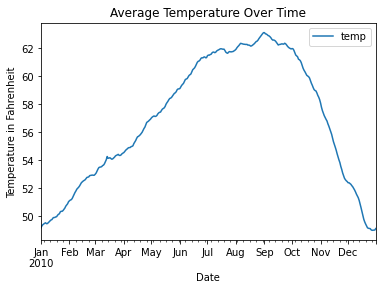

In [35]:
df.resample('D').mean().plot()
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature in Fahrenheit')

plt.show()

# 2. Write the code necessary to visualize the minimum temperature over time.

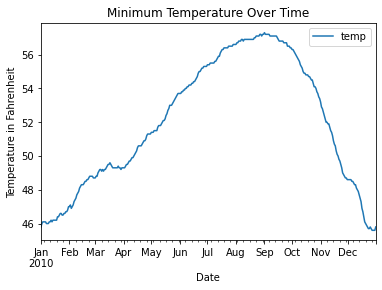

In [36]:
df.resample('D').min().plot()
plt.title('Minimum Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature in Fahrenheit')

plt.show()

# 3. Write the code necessary to visualize the maximum temperature over time.

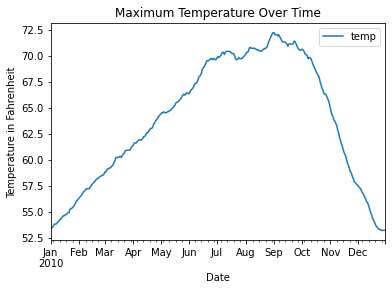

In [37]:
df.resample('D').max().plot()
plt.title('Maximum Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature in Fahrenheit')

plt.show()

# 4. Which month is the coldest, on average?

In [42]:
df.resample('M').mean().idxmin()
print('January')

January


# 5. Which month has the highest average temperature?

In [44]:
df.resample('M').mean().idxmax()
print('September')

September


# 6. Resample by the day and calculate the min and max temp for the day (Hint: `.agg(['min', 'max'])`). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [46]:
sf_df = df.resample('D').agg(['min', 'max'])
sf_df

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8
...          ...   ...
2010-12-27  45.6  53.2
2010-12-28  45.6  53.2
2010-12-29  45.6  53.2
2010-12-30  45.6  53.2
2010-12-31  45.8  53.2

[365 rows x 2 columns]

In [48]:
sf_df.columns

MultiIndex([('temp', 'min'),
            ('temp', 'max')],
           )

In [56]:
sf_df['diff'] = sf_df['temp']['max'] - sf_df['temp']['min']

In [57]:
sf_df

temp       diff
             min   max     
date                       
2010-01-01  45.8  53.3  7.5
2010-01-02  46.0  53.4  7.4
2010-01-03  46.1  53.5  7.4
2010-01-04  46.1  53.6  7.5
2010-01-05  46.1  53.8  7.7
...          ...   ...  ...
2010-12-27  45.6  53.2  7.6
2010-12-28  45.6  53.2  7.6
2010-12-29  45.6  53.2  7.6
2010-12-30  45.6  53.2  7.6
2010-12-31  45.8  53.2  7.4

[365 rows x 3 columns]

In [59]:
sf_df.sort_values('diff').tail(1)

temp        diff
             min   max      
date                        
2010-08-31  57.2  72.2  15.0

# 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [63]:
from vega_datasets import data
seattle_df = data.seattle_weather()

In [64]:
seattle_df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [65]:
seattle_df = seattle_df.set_index('date').sort_index()

In [66]:
seattle_df.sort_values(by='precipitation').tail(1)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2015-03-15,55.9,10.6,6.1,4.2,fog


Use the dataset to answer the following questions:

- Which year and month combination has the highest amount of precipitation?
- Visualize the amount of monthly precipitation over time.
- Visualize the amount of wind over time. Choose a time interval you think is appropriate.
- Which year-month combination is the windiest?
- What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
- In which month does it rain the most?
- Which month has the most number of days with a non-zero amount of precipitation?

In [4]:
data.flights_20k()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


- Convert any negative delays to 0.
- Which hour of the day has the highest average delay?
- Does the day of the week make a difference in the delay amount?
- Does the month make a difference in the delay amount?

# Bonus

In [5]:
from vega_datasets import data
data.iowa_electricity()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883
5,2006-01-01,Fossil Fuels,37014
6,2007-01-01,Fossil Fuels,41389
7,2008-01-01,Fossil Fuels,42734
8,2009-01-01,Fossil Fuels,38620
9,2010-01-01,Fossil Fuels,42750


- For each row, calculate the percentage of the year's total that energy source provided.
- Lineplot of generation over time, color by source
- Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
- Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
- Is the total generation increasing over time?
    - How would you control for increasing consumption over time when considering how much energy is coming from each source?
    - express each number as a % of the year's total


1. Use the sf_temps dataset
2. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)
3. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.
4. Create pretty labels for time plots
5. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

# Explore the birdstrikes dataset.

In [7]:
df = data.birdstrikes()